In [1]:
import numpy as np
from scipy.integrate import quad
from scipy import constants
import matplotlib.pyplot as plt
from scipy.optimize import brentq, newton, fsolve


# Se definen los integrandos para cada potencial que luego seran integrados numericamente para encontrar el angulo de scatter

def Yunkawa(u,alpha):
    return (k*u) * np.exp(-alpha * (1/u))

def integrandY(u,E,b,alpha):
    return 1 / np.sqrt(1 - Yunkawa(u,alpha) / E - b ** 2 * u ** 2)


def coulomb_analytic(E, b):
    l2 = 2 * E * m * b ** 2  # Momento angular al cuadrado

    # Coeficientes de la ecuación cúbica: E * r^4 - (l2 / 2m) * r - k = 0
    coef = [E ** 2, -k, -l2 / (2 * m)]

    # Usamos np.roots para encontrar las raíces de la ecuación cúbica
    roots = np.roots(coef)

    # Filtrar las raíces reales positivas
    roots_reales = [r.real for r in roots if r.imag == 0 and r.real > 0]

    if roots_reales:
        r_min = min(roots_reales)  # Nos interesa la raíz más pequeña
        return r_min
    else:
        raise ValueError("No se encontraron raíces reales y positivas.")

def umin(E, b, alpha):
    l2 = 2 * E * m * b ** 2  # Momento angular al cuadrado

    def ecuacion(r):
        return  E * r ** 2 - k*r*np.exp(-alpha*r) - l2 / (2 * m)
    posible=coulomb_analytic(E,b)
    # Encontrar el valor de r que minimiza la distancia
    raiz = newton(ecuacion,posible)  # Usamos b como aproximación inicial
    return 1 / raiz  # Devuelve el valor en términos de u_min


#Se realiza el proceso de integracion numerico con los integrandos anteriores, y se definen los valores del momento angular, la e y la q para definir
#los limites de integracion
def scatterY(E,b,alpha):
    u_m=umin(E,b,alpha)
    theta_max, error = quad(lambda u: integrandY(u, E, b,alpha), 0, u_m)
    x=np.pi-2 * theta_max * b
    return x

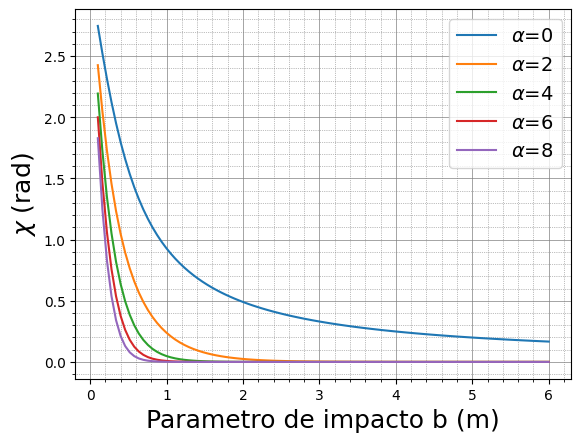

In [12]:
E=1
k=1
m=1
b=np.linspace(0.1,6,100)
angulosY=[]
for i in range(0, 10, 2):
  angulosY=[]
  for j in range(len(b)):
    angulosY.append(scatterY(E,b[j],i))
  plt.plot(b,angulosY,label=fr'$\alpha$={i}')
  plt.legend()

plt.legend()

plt.xlabel(r"Parametro de impacto b (m)", fontsize=18)
plt.ylabel(r"$\chi$ (rad)", fontsize=18)
# plt.title(r"Comparación $\chi$ con respecto al parametro b", fontsize=18)
plt.legend(loc='best', fontsize=14)
# Configuring a GeoGebra-like mesh
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)  # Major grid lines
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)  # Minor grid lines
# Adding minor ticks to create a finer grid
plt.minorticks_on()
plt.show()

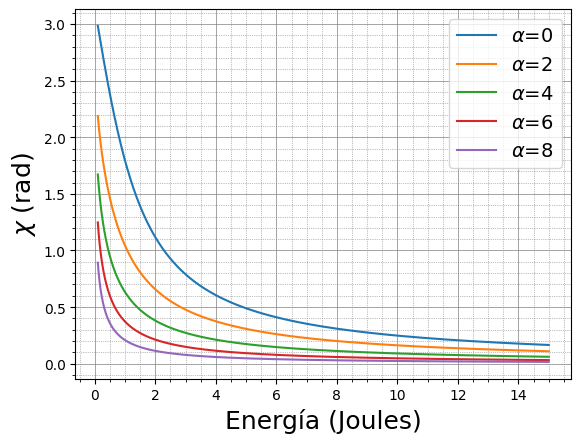

In [13]:
b=0.4

E=np.linspace(0.1,15,1000)
angulosY=[]
for i in range(0, 10, 2):
  angulosY=[]
  for j in range(len(E)):
    angulosY.append(scatterY(E[j],b,i))

  plt.plot(E,angulosY,label=fr'$\alpha$={i}')
  plt.legend()

plt.legend()

plt.xlabel("Energía (Joules)", fontsize=18)
plt.ylabel(r"$\chi$ (rad)", fontsize=18)
# plt.title("Comparación angulos con respecto a la energía", fontsize=18)
plt.legend(loc='best', fontsize=14)
# Configuring a GeoGebra-like mesh
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)  # Major grid lines
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)  # Minor grid lines
# Adding minor ticks to create a finer grid
plt.minorticks_on()
plt.show()



/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:1239: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:1247: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/tmp/ipykernel_882/1192699022.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10e4)


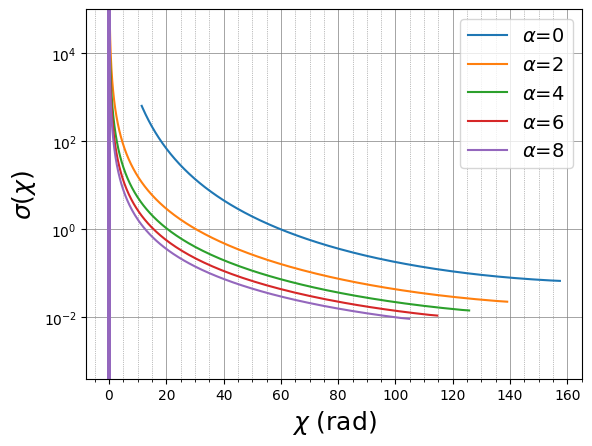

In [14]:
m=1
k=1
E = 1  # Energía en julios (1 MeV)
b_vals = np.linspace(0.1, 5, 1000)  # Valores del parámetro de impacto

# Calcular el ángulo de dispersión chi para cada b

for i in range(0, 10, 2):
  chi_vals=[]
  for j in range(len(b_vals)):
    chi_vals.append(scatterY(E,b_vals[j],i))
  chi_vals = np.radians(chi_vals)
  # Cálculo numérico de db/dchi usando diferencias finitas
  db_dchi = np.gradient(b_vals, chi_vals)
  sigma_numerical = (b_vals / np.sin(chi_vals)) * np.abs(db_dchi)
  plt.plot(np.degrees(chi_vals), sigma_numerical, label=fr'$\alpha$={i}')
  plt.legend()


plt.yscale('log')
plt.xlabel(r'$\chi$ (rad)', fontsize=18)
plt.ylabel(r'$\sigma(\chi)$', fontsize=18)
# plt.title(r'Sección transversal diferencial con distintos parametros de apantallamiento', fontsize=18)
plt.ylim(0,10e4)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
# Configuring a GeoGebra-like mesh
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)  # Major grid lines
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)  # Minor grid lines
# Adding minor ticks to create a finer grid
plt.minorticks_on()
plt.show()

/tmp/ipykernel_882/3705291910.py:17: RuntimeWarning: overflow encountered in exp
  return (k*u) * np.exp(-alpha * (1/u))
/tmp/ipykernel_882/3705291910.py:20: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(1 - Yunkawa(u,alpha) / E - b ** 2 * u ** 2)
/tmp/ipykernel_882/3705291910.py:56: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  theta_max, error = quad(lambda u: integrandY(u, E, b,alpha), 0, u_m)
/tmp/ipykernel_882/2174093211.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10e5)


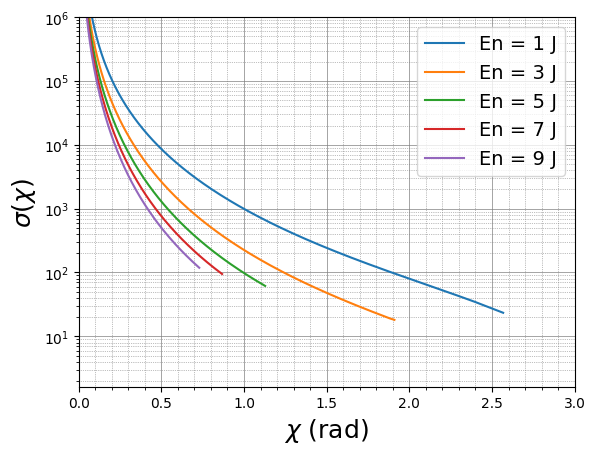

In [5]:
m=1
k=1
alpha = 1 # Energía en julios (1 MeV)
b_vals = np.linspace(0.1, 3, 1000)  # Valores del parámetro de impacto

# Calcular el ángulo de dispersión chi para cada b

for i in range(1, 10, 2):
  chi_vals=[]
  for j in range(len(b_vals)):
    chi_vals.append(scatterY(i,b_vals[j],alpha))
  chi_vals = np.radians(chi_vals)
  # Cálculo numérico de db/dchi usando diferencias finitas
  db_dchi = np.gradient(b_vals, chi_vals)
  sigma_numerical = (b_vals / np.sin(chi_vals)) * np.abs(db_dchi)
  plt.plot(np.degrees(chi_vals), sigma_numerical, label=f'En = {i} J')
  plt.legend()


plt.yscale('log')
plt.xlabel(r'$\chi$ (rad)', fontsize=18)
plt.ylabel(r'$\sigma(\chi)$', fontsize=18)
# plt.title('Sección transversal diferencial con distintas energías', fontsize=18)
plt.ylim(0,10e5)
plt.xlim(0,3)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
# Configuring a GeoGebra-like mesh
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)  # Major grid lines
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)  # Minor grid lines
# Adding minor ticks to create a finer grid
plt.minorticks_on()
plt.show()

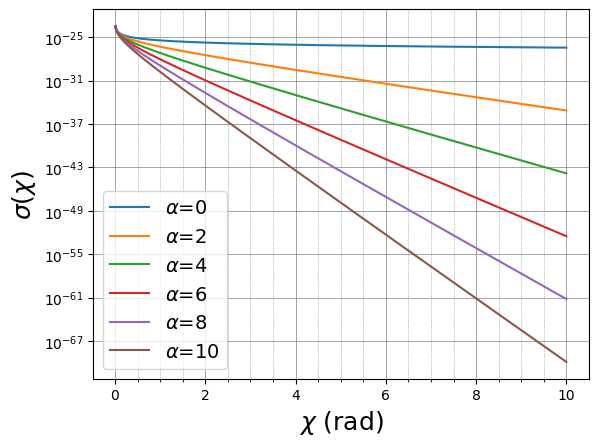

In [8]:
# Distancias
r = np.linspace(0.01, 10, 5000)

# Potencial de Coulomb
V_C = 1 / r

# # Potencial de Yukawa
# a = np.linspace(0, 11, 2)
# for i in range(len(a)):
#     V = (1 / r) * np.exp(-a[i] * r)
#     plt.plot(r, V, label=fr'$\alpha$={i}')

# Definir los parámetros conocidos
q1 = constants.e * 79  # Masa que esta en el foco (Nucleo de oro)
q2 = constants.e * 2   # Particula Alpha
m = 6.64424e-27       # Masa de la particula alpha
k = (q1*q2)/(4*np.pi*constants.epsilon_0)  # Constante del potencial

plt.plot(r, (k / r) , label=fr'$\alpha$=0')
plt.plot(r, (k / r) * np.exp(-2 * r), label=fr'$\alpha$=2')
plt.plot(r, (k / r) * np.exp(-4 * r), label=fr'$\alpha$=4')
plt.plot(r, (k / r) * np.exp(-6 * r), label=fr'$\alpha$=6')
plt.plot(r, (k / r) * np.exp(-8 * r), label=fr'$\alpha$=8')
plt.plot(r, (k / r) * np.exp(-10 * r), label=fr'$\alpha$=10')
    


# Graficar
plt.yscale('log')
plt.xlabel(r'$\chi$ (rad)', fontsize=18)
plt.ylabel(r'$\sigma(\chi)$', fontsize=18)
# plt.title('Comparación entre el Potencial de Coulomb y el Potencial de Yukawa', fontsize=18)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
# Configuring a GeoGebra-like mesh
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)  # Major grid lines
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)  # Minor grid lines
# Adding minor ticks to create a finer grid
plt.minorticks_on()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff8ad349-14ae-4105-b717-f9feed4f0ee2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>